In [2]:
import librosa
import librosa.display

In [3]:
audio = 'discomfort/discomfort_1.wav'

In [5]:
y, sr = librosa.load(audio)

In [6]:
print(y)
print(sr)

[-0.00059498 -0.00078233 -0.00097827 ...  0.07309957  0.05529897
  0.02827073]
22050


In [7]:
folder = ['discomfort', 'hungry', 'laugh', 'tired']

In [9]:
for i in range(1, 11):
    a = folder[0] + '/' + folder[0] + '_' + str(i) + '.wav'
    print(a)

discomfort/discomfort_1.wav
discomfort/discomfort_2.wav
discomfort/discomfort_3.wav
discomfort/discomfort_4.wav
discomfort/discomfort_5.wav
discomfort/discomfort_6.wav
discomfort/discomfort_7.wav
discomfort/discomfort_8.wav
discomfort/discomfort_9.wav
discomfort/discomfort_10.wav


In [11]:
for i in range(0, 4):
    b = folder[i] + '/' + folder[i] + '_1' + '.wav'
    print(b)

discomfort/discomfort_1.wav
hungry/hungry_1.wav
laugh/laugh_1.wav
tired/tired_1.wav


In [12]:
import matplotlib.pyplot as plt

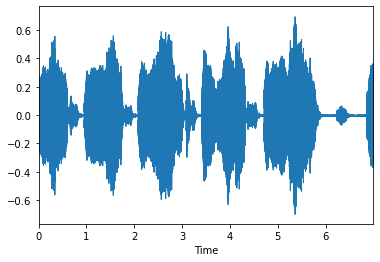

In [13]:
librosa.display.waveplot(y, sr = sr)
plt.show()

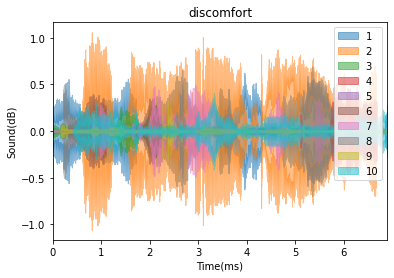

In [15]:
set_label = []
for i in range(1, 11):
    a = folder[0] + '/' + folder[0] + '_' + str(i) + '.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr = sr, alpha = 0.5)
    set_label.append(i)
plt.legend(set_label)
plt.title(folder[0])
plt.xlabel('Time(ms)')
plt.ylabel('Sound(dB)')
plt.show()

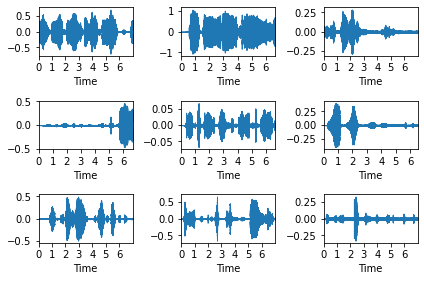

In [21]:

for i in range(1, 10):
    plt.subplot(3, 3, i)
    a = folder[0] + '/' + folder[0] + '_' + str(i) + '.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr = sr)
plt.tight_layout()
plt.show()

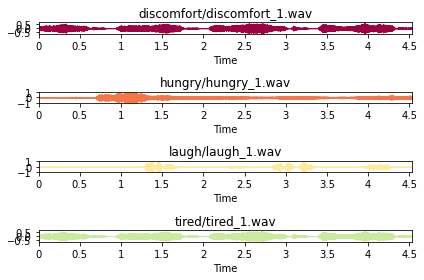

In [30]:
for i in range(0, 4):
    plt.subplot(4, 1, i + 1)
    a = folder[i] + '/' + folder[i] + '_1.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y[:100000], sr = sr, color = plt.cm.Spectral(i * 55))
    plt.title(a)
plt.tight_layout()
plt.show()

In [31]:
import numpy as np

In [32]:
X_train = np.zeros((40, 20))
y_train = np.zeros(40)

In [33]:
y_train[0:20] = 1

In [34]:
for i in range(20):
    audio_path = 'hungry/hungry_' + str(i+1) + '.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis = 1)
    X_train[i] = temp
    
for i in range(20):
    audio_path = 'laugh/laugh_' + str(i+1) + '.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis = 1)
    X_train[i+20] = temp


In [35]:
data_sets = np.zeros((40, 21))
data_sets[:, 0:20] = X_train
data_sets[:, 20] = y_train

In [37]:
import csv
with open('baby_cry.csv', 'w') as f:
    writer = csv.writer(f)
    for i in range(40):
        writer.writerow(data_sets[i, :])

In [39]:
import pandas as pd
df = pd.DataFrame(X_train)

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-321.614410,136.783432,-83.923279,-9.328775,3.367027,-61.757877,-7.430030,12.264894,-32.716934,-7.282160,14.146518,-3.375248,6.855465,5.117864,-13.838795,-8.249882,-7.152685,-10.837823,-2.515141,-3.835665
1,-388.538300,87.067062,-48.054302,6.789166,24.076120,-17.567970,0.817232,3.484522,-17.497438,-2.056369,-0.938349,-13.221357,-1.902255,-2.566589,-9.572586,-0.493253,-0.437532,-2.770103,1.167502,-4.720764
2,-358.802124,104.645393,-48.146358,8.463506,20.622808,-25.966686,-1.599991,5.250613,-12.990738,-0.491302,-8.297749,-16.957111,1.134142,-3.944495,-11.166921,-0.238289,-4.688599,-3.993473,5.862682,-2.601516
3,-307.225464,144.330658,-65.774918,-13.554115,11.943622,-35.879139,-18.474222,-10.382345,-11.564787,11.852363,-6.179099,-18.505484,6.698543,-2.210913,-12.753139,4.135049,-0.617079,-6.392970,-2.251874,-13.602869
4,-222.320419,145.112656,-77.100899,4.823740,13.880885,-43.173820,9.636121,10.342172,-24.953396,4.068454,-3.252303,-21.671261,3.333987,-1.764612,-10.188364,4.937203,-3.634663,-4.583784,6.367449,-3.418234
5,-317.400574,173.146454,-55.532753,13.388688,38.287296,-20.297903,10.084037,17.871964,-10.802204,4.147353,-0.728283,-11.698583,6.804092,-0.053930,-6.685740,6.438583,-4.175872,-8.417589,3.399852,-4.295537
6,-304.179688,147.689835,-54.555344,11.288173,23.076685,-53.735435,-18.716093,11.801846,-27.091679,-19.685570,-2.020459,-16.373224,-9.212306,-2.208493,-12.916853,-7.766852,0.203730,4.407862,17.073269,19.418777
7,-265.595367,135.035294,-97.338577,-4.516263,12.818225,-54.008415,-5.490152,7.940290,-16.947369,10.036357,0.638228,-14.466528,8.455102,-4.316942,-11.880944,10.429338,1.282484,-4.224214,5.752604,-6.611502
8,-275.391571,165.604355,-69.009842,-6.706756,12.580020,-44.441010,-11.909169,0.599498,-14.610462,4.043555,-6.775931,-11.640265,11.997015,-0.516600,-5.217813,9.744744,-8.315960,-12.453735,1.840698,-11.357384
9,-390.664398,121.402153,-37.606987,13.486464,13.147367,-27.002733,7.278170,0.205411,-21.938156,2.485548,-6.807224,-16.331705,5.481968,-6.213018,-13.824759,1.837147,-8.526330,-10.081342,2.165314,-8.634636


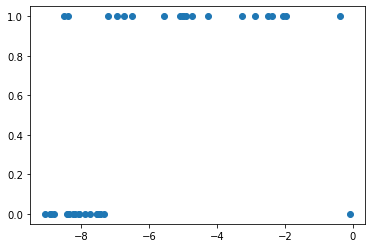

In [41]:
X = np.median(X_train, axis = 1)
y = y_train
plt.scatter(X, y)
plt.show()

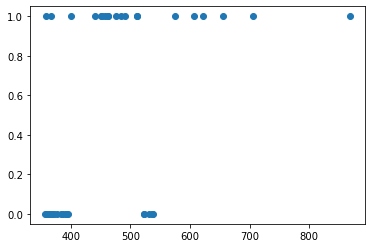

In [42]:
def AccumAscentCurv(A):
    accVal = 0
    for i in range(len(A) - 1):
        accVal=accVal + abs(A[i+1] - A[i])
        return accVal
X = [AccumAscentCurv(X_train[i]) for i in range(40)]
y = y_train
plt.scatter(X, y)
plt.show()

In [43]:
X = np.array(X).reshape(40, 1)

In [44]:
y = y.reshape(40, 1)

In [45]:
print(X[:5])

[[458.39784241]
 [475.60536194]
 [463.4475174 ]
 [451.55612183]
 [367.43307495]]


In [48]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
def cost_func(X, a):
    delta = le - 7
    temp = beta0 + np.dot(X, beta1)
    Y_pred = sigmoid(temp)
    return -np.sum(a * np.log(Y_pred + delta) + (1 - a) * np.log((1 - Y_pred) + delta))

In [49]:
def Error(X, a):
    delta = le - 7
    temp = beta0 + np.dot(X, beta1)
    Y_pred = sigmoid(temp)
    return -np.sum(a * np.log(Y_pred + delta) + (1 - a) * np.log((1 - Y_pred) + delta))

In [50]:
def predict(X):
    temp = np.dot(X, beta1) + beta0
    Y_pred = sigmoid(temp)
    if Y_pred >= 0.79:
        result = 1
    else:
        result = 0
    return Y_pred, result

In [51]:
def numerical_derivative(f, x):
    delta_x = le-4
    

SyntaxError: unexpected EOF while parsing (<ipython-input-51-415fcee4816c>, line 1)